# 7 Wonders Data Analysis
![7 Wonders](img.jpg)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

### Load Data

In [16]:
df = pd.read_csv('data/7wonders.csv')
df.dropna(axis=1, inplace=True, how='all')
df.fillna(0, axis=1, inplace=True)

df_indexed = df.set_index('Jogo#')

matches = list(set(df['Jogo#']))

df.head()

,Jogo#,Jogador,Tabuleiro,Militar,Riqueza,Maravilha,Civil,Comércio,Ciência,Guilda,Cidade,Total,Posição
0,1.0,Rajiv,Éphesos,4.0,10.0,10.0,22.0,3.0,0.0,7.0,8.0,64,1.0
1,1.0,Clara,Halikarnassós,5.0,1.0,3.0,11.0,0.0,20.0,0.0,0.0,40,4.0
2,1.0,Theo,Rhódos,15.0,6.0,7.0,9.0,4.0,10.0,7.0,0.0,58,2.0
3,1.0,Lais,Olympía,-4.0,1.0,5.0,19.0,3.0,2.0,13.0,3.0,42,3.0
4,2.0,Rajiv,Rhódos,17.0,1.0,7.0,15.0,12.0,0.0,11.0,0.0,63,1.0


### Player Measure

##### Dicts containing player data

- matches_played
- wins
- winrate
- 2nd_place
- 3rd_place
- max_points
- red_average
- green_average
- max_green
- blue_average
- wonder_most_played
- wonder_most_win

In [17]:
matches_played = df['Jogador'].value_counts().to_dict()

### Measuring wins

In [18]:
wins = dict.fromkeys(list(set(df['Jogador'])), 0)

for match in matches:
    temp_df = df_indexed.loc[match]
    wins[temp_df[temp_df['Total']==temp_df['Total'].max()].iloc[0]['Jogador']] += 1

wins = dict(sorted(wins.items(), key=lambda x: x[1], reverse=True)) 
print(wins)

{'Rajiv': 37, 'Theo': 24, 'Lais': 18, 'Laura': 11, 'Radif': 9, 'Clara': 7, 'Leandro': 3, 'Rafael': 2, 'Gustavo': 2, 0: 1, 'Guga': 1, 'Junior': 0, 'A Crente': 0, 'Felipe': 0, 'Keverson': 0, 'Bia': 0, 'Bial': 0, 'Milleny': 0}


In [19]:
winrate = {}

for key in wins.keys():
    winrate[key] = 100.0 * wins[key] / matches_played[key]

winrate = dict(sorted(winrate.items(), key=lambda x: x[1], reverse=True))
print(winrate)

{'Rajiv': 52.857142857142854, 'Radif': 33.333333333333336, 'Theo': 24.489795918367346, 'Rafael': 20.0, 'Lais': 17.647058823529413, 'Laura': 16.666666666666668, 'Guga': 14.285714285714286, 'Gustavo': 13.333333333333334, 'Leandro': 12.0, 'Clara': 10.606060606060606, 0: 1.3157894736842106, 'Junior': 0.0, 'A Crente': 0.0, 'Felipe': 0.0, 'Keverson': 0.0, 'Bia': 0.0, 'Bial': 0.0, 'Milleny': 0.0}


### Wonder Measure

### Plots

In [22]:
# Bar chart - Winrate

plot_winrate = {k:v for k,v in winrate.items() if v != 0}

plt.bar(*zip(*plot_winrate.items()))
#plt.xticks(rotation='vertical')
plt.title('Porcentagem de Vitórias')
plt.ylim(0,100)
plt.ylabel('Jogos Vencidos por Número de Jogos (%)')
#plt.grid(True, axis='y', linestyle='--')

for k,v in plot_winrate.items():
    plt.annotate('{:.1f}%'.format(v), (k,v), textcoords='offset points', xytext=(0,5), ha='center')
    plt.annotate('{}/{}'.format(wins[k], matches_played[k]), (k,v), textcoords='offset points', xytext=(0,-15), ha='center')

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a int

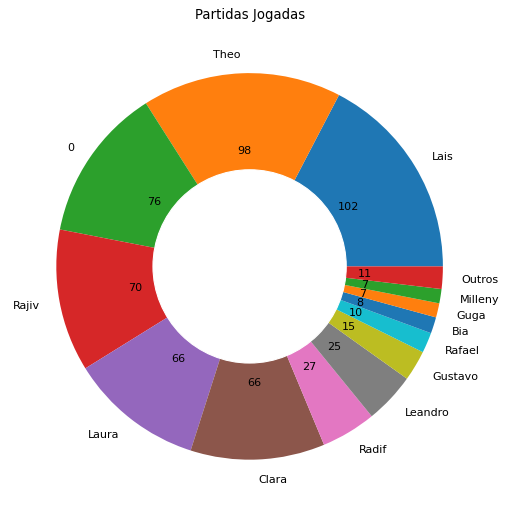

In [21]:
# Donut chart - Matches played

plot_matches_played = matches_played.copy()
thresh = 4
others = 0
keys_to_remove = []
for k,v in plot_matches_played.items():
    if v <= thresh:
        others += v
        keys_to_remove.append(k)

for k in keys_to_remove:
    del plot_matches_played[k]
plot_matches_played['Outros'] = others

plt.pie([float(v) for v in plot_matches_played.values()], labels=plot_matches_played.keys(),
autopct=lambda m: '{:.0f}'.format(m/100.0*sum(plot_matches_played.values())))
plt.title('Partidas Jogadas')

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [ ]:
# Bubble plot


